# FIFA 18 Data Exploration and Visualization With Python
***

***Piotr Skalski - 14.10.2017***

# Table of Contents

* [1. Importing dataset and preparation of data](#importing_dataset_and_preparation_of_data) <br>
   * [1.1. Load dataset](#load_dataset) <br>
   * [1.2. Let's summarize the Dataset](#lets_summarize_the_dataset) <br>
   * [1.3. Data preprocessing](#data_preprocessing) <br>
      * [1.3.1. Numeric columns of Value and Wage](#numeric_columns_of_value_and_wage) <br>
      * [1.3.2. Categorical columns of Value and Wage](#categorical_columns_of_value_and_wage) <br>
      * [1.3.3. Potential points](#potential_points) <br>
      * [1.3.4. Preferred position](#preferred_position) <br>
      * [1.3.5. Continent](#continent) <br>
<br>
* [2. Data Visualization Age/Overall/Potential](#data_visualization_age_overall_potential) <br>
   * [2.1. Grouping players by Nationality](#grouping_players_by_nationality) <br>
   * [2.2. Top 20 players value](#top_20_players_value) <br>
   * [2.3. Grouping players by Age](#grouping_players_by_age) <br>
   * [2.4. Grouping players by Overall](#grouping_players_by_overall) <br>
   * [2.5. Age vs Mean Overall Rating](#age_vs_mean_overall_rating) <br>
   * [2.6. Age vs Potential Points](#age_vs_potential_points) <br>
   * [2.7. Grouping players by Preffered Position](#grouping_players_by_preffered_position) <br>
<br>
* [3. Data Visualization Value/Wage](#data_value_wage) <br>
   * [3.1. Ten players with highest value](#ten_players_with_highest_value) <br>
   * [3.2. Ten players with highest wage](#ten_players_with_highest_wage) <br>
   * [3.3. Player value distribution](#player_value_distribution) <br>
   * [3.4. Over or Under Mean Value](#over_or_under_mean_value) <br>
   * [3.5. Over or Under Mean Wage](#over_or_under_mean_wage) <br>
   * [3.6. Players Value vs Age & Overall](#players_value_vs_age_overall) <br>
   * [3.7. Players Wage vs Age & Overall](#players_wage_vs_age_overall) <br>
   * [3.8. Overall vs Wage and Value](#overall_vs_wage_and_value) <br>
   * [3.9. Player Position vs Value](#player_position_vs_value) <br>
   * [3.10. Top 1000 players Age vs. Mean Value](#top_1000_players_age_vs_mean_value) <br>
   * [3.11. Clubs value](#clubs_value) <br>

<img src='https://compass-ssl.xbox.com/assets/e3/8a/e38a0652-17a2-4f64-80e0-8d69f0223126.jpg?n=FF18_gallery-desktop_1154x649_03.jpg'>

<b>NOTE:</b> First of all let's import essential libraries:

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

## 1. Importing dataset and preparation of data
<a id="importing_dataset_and_preparation_of_data"></a>

### 1.1 Load dataset
<a id="load_dataset"></a>

In [2]:
# Importing the dataset
dataset = pd.read_csv('CompleteDataset.csv', header = 0)

C:\Users\jagno\.conda\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning:

Columns (23,35) have mixed types.Specify dtype option on import or set low_memory=False.



<b>NOTE:</b> Let's select the most interesting columns from loaded dataset:

In [3]:
interesting_columns = [
    'Name', 
    'Age', 
    'Photo', 
    'Nationality', 
    'Overall', 
    'Potential', 
    'Club', 
    'Value', 
    'Wage', 
    'Preferred Positions'
]
dataset = pd.DataFrame(dataset, columns=interesting_columns)

### 1.2. Let's summarize the Dataset
<a id="lets_summarize_the_dataset"></a>

In [4]:
dataset.head(3)

,Name,Age,Photo,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,93,93,FC Barcelona,€105M,€565K,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 17981 non-null  object
 1   Age                  17981 non-null  int64 
 2   Photo                17981 non-null  object
 3   Nationality          17981 non-null  object
 4   Overall              17981 non-null  int64 
 5   Potential            17981 non-null  int64 
 6   Club                 17733 non-null  object
 7   Value                17981 non-null  object
 8   Wage                 17981 non-null  object
 9   Preferred Positions  17981 non-null  object
dtypes: int64(3), object(7)
memory usage: 1.4+ MB


### 1.3. Data preprocessing
<a id="data_preprocessing"></a>

### 1.3.1. Numeric columns of Value and Wage
<a id="numeric_columns_of_value_and_wage"></a>

<b>NOTE:</b> Right away we can see that values in columns: 'Value' and 'Wage' aren't numeric but objects. Firstly we need to preprocess the data to make it usable for us. We will use short supporting function to convert values in those two columns into numbers. We will end up with two new columns 'ValueNum' and 'WageNum' that will contain numeric values.

In [6]:
# Supporting function for converting string values into numbers
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    

#dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
dataset['ValueNum'] = dataset['Value'].apply(lambda x: str2number(x))
dataset['WageNum'] = dataset['Wage'].apply(lambda x: str2number(x))

### 1.3.2. Categorical columns of Value and Wage
<a id="categorical_columns_of_value_and_wage"></a>

<b>NOTE:</b> We will also add two additional columns: 'ValueCategory' and 'WageCategory'. We will use those collumns to divide players into ten classes basing on their value and incom.

In [7]:
max_value = float(dataset['ValueNum'].max() + 1)
max_wage = float(dataset['WageNum'].max() + 1)

# Supporting function for creating category columns 'ValueCategory' and 'WageCategory'
def mappingAmount(x, max_amount):
    for i in range(0, 10):
        if x >= max_amount/10*i and x < max_amount/10*(i+1):
            return i
        
dataset['ValueCategory'] = dataset['ValueNum'].apply(lambda x: mappingAmount(x, max_value))
dataset['WageCategory'] = dataset['WageNum'].apply(lambda x: mappingAmount(x, max_wage))

<b>NOTE:</b> Next we add columns: 'OverMeanValue' and 'OverMeanWage'. They will contain two categories 0 and 1 and inform if player value/wage is highier then mean value.

In [8]:
mean_value = float(dataset["ValueNum"].mean())
mean_wage = float(dataset["WageNum"].mean())

# Supporting function for creating category columns 'OverMeanValue' and 'OverMeanWage'
def overValue(x, limit):
    if x > limit:
        return 1
    else:
        return 0
    
dataset['OverMeanValue'] = dataset['ValueNum'].apply(lambda x: overValue(x, mean_value))
dataset['OverMeanWage'] = dataset['WageNum'].apply(lambda x: overValue(x, mean_wage))

### 1.3.3. Potential points
<a id="potential_points"></a>

In [9]:
dataset['PotentialPoints'] = dataset['Potential'] - dataset['Overall']

### 1.3.4. Preferred position
<a id="preferred_position"></a>

<b>NOTE:</b> We will add two more columns. To make things simpler we select first position from list as preferred and save it in 'Position' column. We will also count number of alternative positions and store it in column 'PositionNum'.

In [10]:
dataset['Position'] = dataset['Preferred Positions'].str.split().str[0]

In [11]:
dataset['PositionNum'] = dataset['Preferred Positions'].apply(lambda x: len(x.split()))

### 1.3.5. Continent
<a id="continent"></a>

In [12]:
# List of countries for each continent
continents = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}

# Function matching continent to countries
def find_continent(x, continents_list):
    # Iteration over 
    for key in continents_list:
        if x in continents_list[key]:
            return key
    return np.NaN

dataset['Continent'] = dataset['Nationality'].apply(lambda x: find_continent(x, continents))

## 2. Data Visualization Age/Overall/Potential
<a id="data_visualization_age_overall_potential"></a>

### 2.1. Grouping players by Nationality
<a id="grouping_players_by_nationality"></a>

> <b>NOTE: </b> This chapter is inspired by <a href="https://www.kaggle.com/arthurtok/zoomable-circle-packing-via-d3-js-in-ipython">Zoomable Circle Packing via D3.js in IPython</a>. Thank you.

In [13]:
from IPython.core.display import display, HTML, Javascript
from string import Template
import json
import IPython.display

In [14]:
top_1000 = dataset.sort_values("Overall", ascending=False).reset_index().head(1000)[["Name", "Nationality", "Continent", "Overall", "Club"]]

In [15]:
Africa = top_1000[top_1000["Continent"]=='Africa']
Antarctica = top_1000[top_1000["Continent"]=='Antarctica']
Asia = top_1000[top_1000["Continent"]=='Asia']
Australia_Oceania =  top_1000[top_1000["Continent"]=='Australia_Oceania']
Europe = top_1000[top_1000["Continent"]=='Europe']
North_america = top_1000[top_1000["Continent"]=='North_america']
South_america = top_1000[top_1000["Continent"]=='South_america']

data = {}
data["name"] = "DISTRIBUTION OF TOP 1000 PLAERS DUE TO NATIONALITY"
data["children"] = []
# Split dataset into Continents:
for continent in top_1000['Continent'].unique():
    
    continent_set = top_1000[top_1000["Continent"]==continent]
    continent_dict = {}
    continent_dict["name"] = continent
    continent_dict["children"] = []
    
    for country in continent_set['Nationality'].unique():
        
        countries_set = continent_set[continent_set['Nationality']==country][['Name', 'Overall']]
        
        country_dict = {}
        country_dict["name"] = country
        country_dict["children"] = []
        
        for player in countries_set.values:
            
            player_dict = {}
            player_dict['name'] = player[0]
            player_dict['size'] = player[1]
            country_dict["children"].append(player_dict)
            
        continent_dict['children'].append(country_dict)
        
    data["children"].append(continent_dict)

In [16]:
North_america_dict = {}
North_america_dict['name'] = 'North_america'
North_america_dict['children'] = []
for country in North_america['Nationality'].unique():
    list_of_countries = North_america[North_america['Nationality']==country][['Name', 'Overall']].rename(columns={'Name': 'name', 'Overall': 'size'})
    tmp_dict = {}
    tmp_dict["name"] = country
    tmp_dict["children"] = []
    for row in list_of_countries.values:
        player_tmp = {}
        player_tmp['name'] = row[0]
        player_tmp['size'] = row[1]
        tmp_dict["children"].append(player_tmp)
    North_america_dict['children'].append(tmp_dict)

In [17]:
html_string = """
<!DOCTYPE html>
<meta charset="utf-8">
<style>

.node {
  cursor: pointer;
}

.node:hover {
  stroke: #000;
  stroke-width: 1.5px;
}

.node--leaf {
  fill: white;
}

.label {
  font: 11px "Helvetica Neue", Helvetica, Arial, sans-serif;
  text-anchor: middle;
  text-shadow: 0 1px 0 #fff, 1px 0 0 #fff, -1px 0 0 #fff, 0 -1px 0 #fff;
}

.label,
.node--root,
.node--leaf {
  pointer-events: none;
}

</style>
<svg width="800" height="800"></svg>
"""

In [18]:
js_string="""
 require.config({
    paths: {
        d3: "https://d3js.org/d3.v4.min"
     }
 });

  require(["d3"], function(d3) {

   console.log(d3);

var svg = d3.select("svg"),
    margin = 20,
    diameter = +svg.attr("width"),
    g = svg.append("g").attr("transform", "translate(" + diameter / 2 + "," + diameter / 2 + ")");

var color = d3.scaleSequential(d3.interpolatePlasma)
    .domain([-4, 4]);

var pack = d3.pack()
    .size([diameter - margin, diameter - margin])
    .padding(2);

d3.json("output.json", function(error, root) {
  if (error) throw error;

  root = d3.hierarchy(root)
      .sum(function(d) { return d.size; })
      .sort(function(a, b) { return b.value - a.value; });

  var focus = root,
      nodes = pack(root).descendants(),
      view;

  var circle = g.selectAll("circle")
    .data(nodes)
    .enter().append("circle")
      .attr("class", function(d) { return d.parent ? d.children ? "node" : "node node--leaf" : "node node--root"; })
      .style("fill", function(d) { return d.children ? color(d.depth) : null; })
      .on("click", function(d) { if (focus !== d) zoom(d), d3.event.stopPropagation(); });

  var text = g.selectAll("text")
    .data(nodes)
    .enter().append("text")
      .attr("class", "label")
      .style("fill-opacity", function(d) { return d.parent === root ? 1 : 0; })
      .style("display", function(d) { return d.parent === root ? "inline" : "none"; })
      .text(function(d) { return d.data.name; });

  var node = g.selectAll("circle,text");

  svg
      .style("background", color(-1))
      .on("click", function() { zoom(root); });

  zoomTo([root.x, root.y, root.r * 2 + margin]);

  function zoom(d) {
    var focus0 = focus; focus = d;

    var transition = d3.transition()
        .duration(d3.event.altKey ? 7500 : 750)
        .tween("zoom", function(d) {
          var i = d3.interpolateZoom(view, [focus.x, focus.y, focus.r * 2 + margin]);
          return function(t) { zoomTo(i(t)); };
        });

    transition.selectAll("text")
      .filter(function(d) { return d.parent === focus || this.style.display === "inline"; })
        .style("fill-opacity", function(d) { return d.parent === focus ? 1 : 0; })
        .on("start", function(d) { if (d.parent === focus) this.style.display = "inline"; })
        .on("end", function(d) { if (d.parent !== focus) this.style.display = "none"; });
  }

  function zoomTo(v) {
    var k = diameter / v[2]; view = v;
    node.attr("transform", function(d) { return "translate(" + (d.x - v[0]) * k + "," + (d.y - v[1]) * k + ")"; });
    circle.attr("r", function(d) { return d.r * k; });
  }
});
  });
 """

In [19]:
with open('output.json', 'w') as outfile:  
    json.dump(data, outfile)

In [57]:
h = display(HTML(html_string))
j = IPython.display.Javascript(js_string)
IPython.display.display_javascript(j)

### 2.2. Top 20 players value
<a id="top_20_players_value"></a>

In [21]:
players_value = dataset.sort_values("ValueNum", ascending=False).head(20).reset_index()[["Name", "Overall", "PotentialPoints", "ValueNum", "Age"]]

In [22]:
trace1 = go.Bar(
    x = players_value["Name"].tolist(),
    y = players_value["Overall"].tolist(),
    name='Overall',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)

trace2 = go.Bar(
    x = players_value["Name"].tolist(),
    y = players_value["PotentialPoints"].tolist(),
    name='Potential',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Scatter(
    x = players_value["Name"].tolist(),
    y = (players_value["ValueNum"] / 1000000).tolist(),
    name='Value [M€]',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2,trace3]

layout = go.Layout(
    barmode='stack',
    title = 'Is it really worth it?',
    titlefont=dict(size=25),
    width=850,
    height=500,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Overall/Potential',
        anchor = 'x',
        rangemode='tozero'
    ),
    xaxis = dict(title= 'Player Names'),
    yaxis2=dict(
        title='Value [M€]',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 20
    ),
    legend=dict(x=0.05, y=0.05)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 2.3. Grouping players by Age
<a id="grouping_players_by_age"></a>

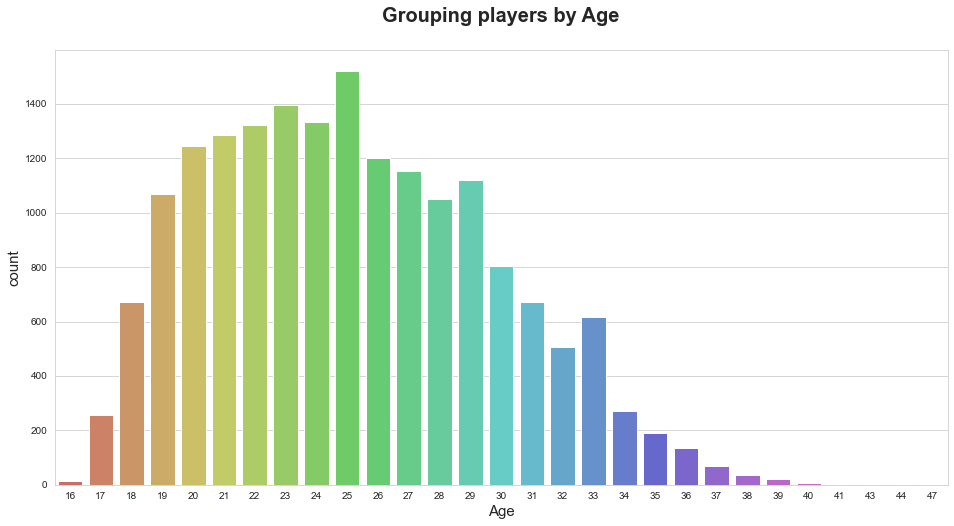

In [23]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Age', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=15)
sns.countplot(x="Age", data=dataset, palette="hls");
plt.show()

### 2.4. Grouping players by Overall
<a id="grouping_players_by_overall"></a>

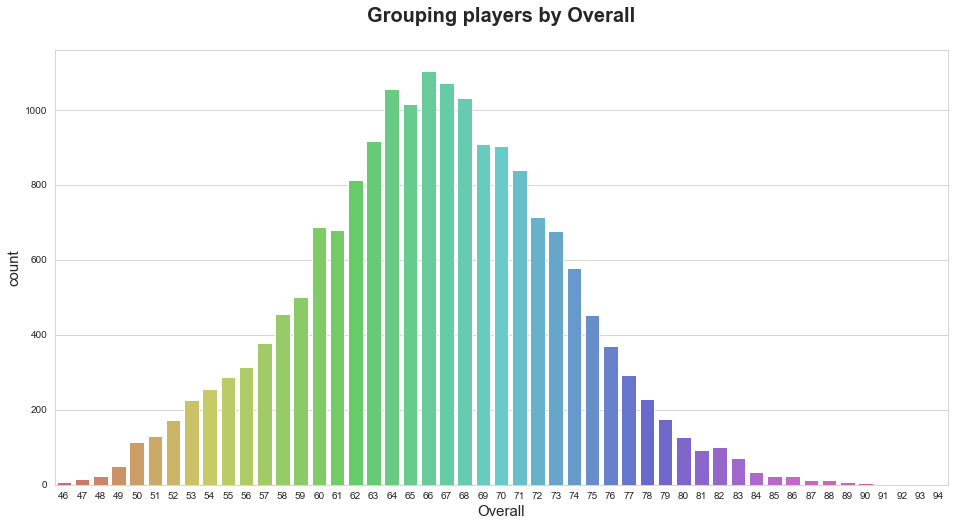

In [24]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Overall', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=15)
sns.countplot(x="Overall", data=dataset, palette="hls");
plt.show()

### 2.5. Age vs Mean Overall Rating
<a id="age_vs_mean_overall_rating"></a>

In [25]:
# Selecting players with age smaller then 40 
dataset40 = dataset.loc[dataset['Age'] <= 40]
# Selecting unique Age from DataFrame
age = dataset40.sort_values("Age")['Age'].unique()
# Selecting mean Overall from DataFrame
overall = dataset40.groupby("Age")["Overall"].mean().values
# Selecting mean Overall from DataFrame
potential = dataset40.groupby("Age")["Potential"].mean().values

<Figure size 432x288 with 0 Axes>

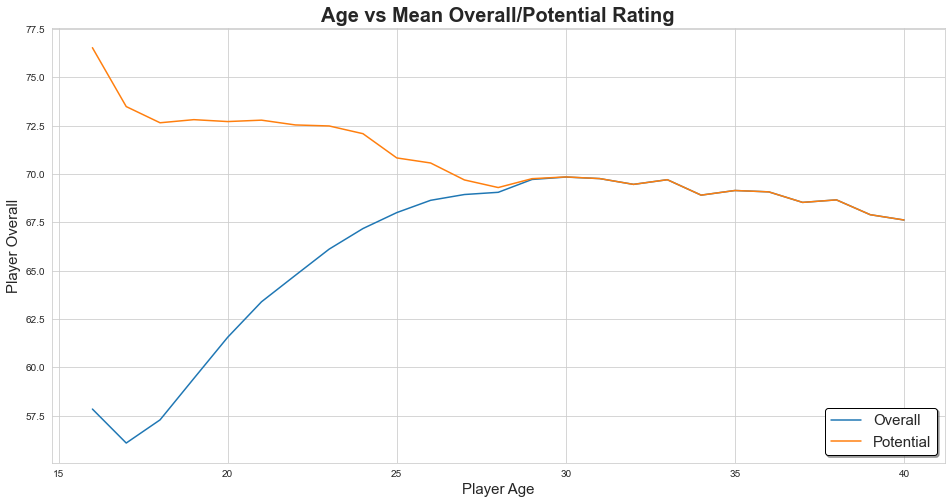

In [26]:
plt.figure()
plt.figure(figsize=(16,8))
plt.title('Age vs Mean Overall/Potential Rating', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Overall', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age, overall, label="Overall")
plt.plot(age, potential, label="Potential")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

### 2.6. Age vs Potential Points
<a id="age_vs_potential_points"></a>

In [27]:
# Selecting mean PotentialPoints from DataFrame
potential_points = dataset40.groupby("Age")["PotentialPoints"].mean().values

<Figure size 432x288 with 0 Axes>

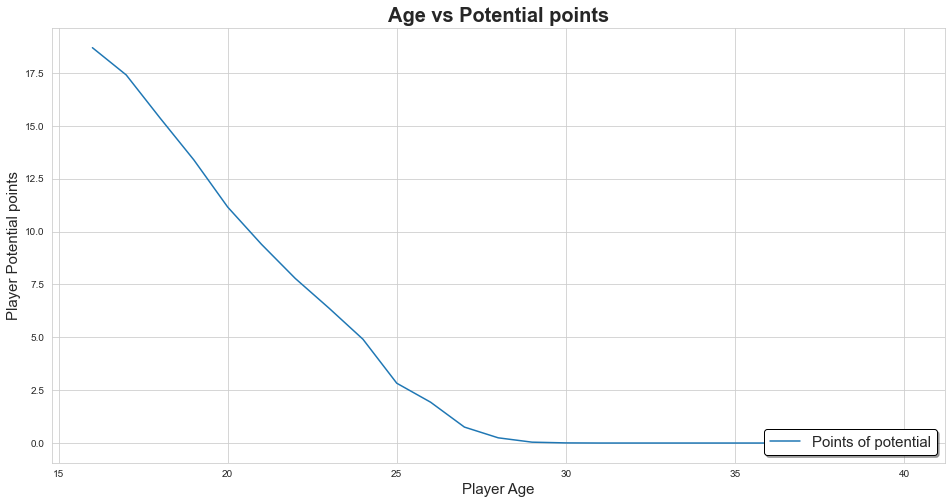

In [28]:
plt.figure()
plt.figure(figsize=(16,8))
plt.title('Age vs Potential points', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Potential points', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age, potential_points, label="Points of potential")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

### 2.7. Grouping players by Preffered Position
<a id="grouping_players_by_preffered_position"></a>

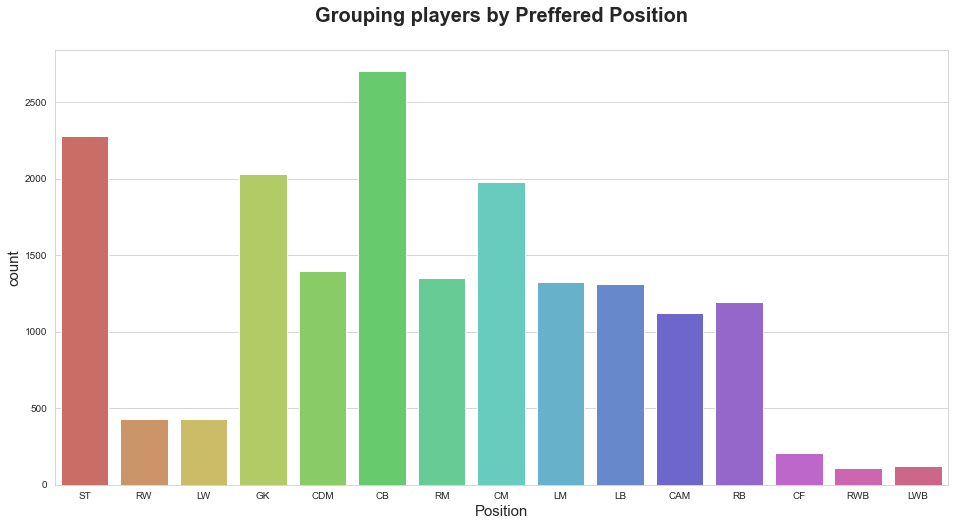

In [29]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Preffered Position', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=15)
sns.countplot(x="Position", data=dataset, palette="hls");
plt.show()

<b>ST</b>  - Striker
<b>RW</b>  - Right winger
<b>LW</b>  - Left winger
<b>GK</b>  - Goalkeeper
<b>CDM</b> - Centre defensive midfield
<b>CB</b>  - Center-back
<b>RM</b>  - Right midfield
<b>CM</b>  - Centre midfield
<b>LM</b>  - Left midfield
<b>LB</b>  - Left-back (Full-back)
<b>CMA</b> - Centre attacking midfield
<b>RB</b>  - Right-back (Full-back)
<b>CF</b>  - Center forward
<b>RWB</b> - Right-back (Full-back)
<b>LWB</b> - Left-back (Full-back)

## 3. Data Visualization Value/Wage
<a id="data_value_wage"></a>

### 3.1. Ten players with highest value
<a id="ten_players_with_highest_value"></a>

In [30]:
sorted_players = dataset.sort_values(["ValueNum"], ascending=False).head(10)
players = sorted_players[["Photo" ,"Name" ,"Age" ,"Nationality" ,"Club", "Value"]].values

In [31]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td><img src="' + str(row[0]) + '"style="width:50px;height:50px;"></td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Photo</th><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Value</th></tr>{}</table>'.format(table_content))
)

Photo,Name,Age,Nationality,Club,Value
,Neymar,25,Brazil,Paris Saint-Germain,€123M
,L. Messi,30,Argentina,FC Barcelona,€105M
,L. Suárez,30,Uruguay,FC Barcelona,€97M
,Cristiano Ronaldo,32,Portugal,Real Madrid CF,€95.5M
,R. Lewandowski,28,Poland,FC Bayern Munich,€92M
,E. Hazard,26,Belgium,Chelsea,€90.5M
,K. De Bruyne,26,Belgium,Manchester City,€83M
,T. Kroos,27,Germany,Real Madrid CF,€79M
,P. Dybala,23,Argentina,Juventus,€79M
,G. Higuaín,29,Argentina,Juventus,€77M


### 3.2. Ten players with highest wage
<a id="ten_players_with_highest_wage"></a>

In [32]:
sorted_players = dataset.sort_values(["WageNum"], ascending=False).head(10)
players = sorted_players[["Photo" ,"Name" ,"Age" ,"Nationality" ,"Club", "Wage"]].values

In [33]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td><img src="' + str(row[0]) + '"style="width:50px;height:50px;"></td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Photo</th><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Wage</th></tr>{}</table>'.format(table_content))
)

Photo,Name,Age,Nationality,Club,Wage
,Cristiano Ronaldo,32,Portugal,Real Madrid CF,€565K
,L. Messi,30,Argentina,FC Barcelona,€565K
,L. Suárez,30,Uruguay,FC Barcelona,€510K
,G. Bale,27,Wales,Real Madrid CF,€370K
,R. Lewandowski,28,Poland,FC Bayern Munich,€355K
,L. Modrić,31,Croatia,Real Madrid CF,€340K
,T. Kroos,27,Germany,Real Madrid CF,€340K
,S. Agüero,29,Argentina,Manchester City,€325K
,Sergio Ramos,31,Spain,Real Madrid CF,€310K
,E. Hazard,26,Belgium,Chelsea,€295K


### 3.3. Player value distribution
<a id="player_value_distribution"></a>

In [34]:
value_distribution = dataset.sort_values("WageNum", ascending=False).reset_index().head(100)[["Name", "WageNum"]]
value_distribution_values = value_distribution["WageNum"].apply(lambda x: x/1000)

<Figure size 432x288 with 0 Axes>

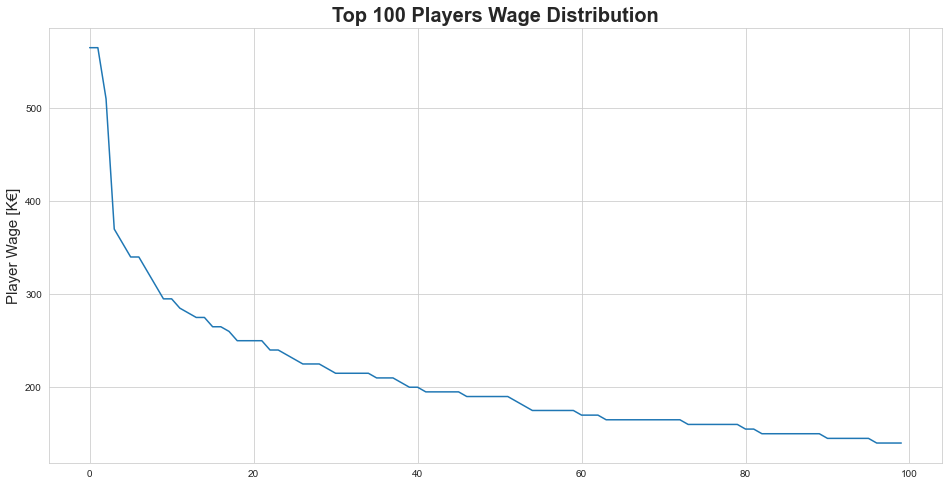

In [35]:
plt.figure()
plt.figure(figsize=(16,8))
plt.title('Top 100 Players Wage Distribution', fontsize=20, fontweight='bold')
plt.ylabel('Player Wage [K€]', fontsize=15)
sns.set_style("whitegrid")
plt.plot(value_distribution_values)
plt.show()

### 3.4. Over or Under Mean Value
<a id="over_or_under_mean_value"></a>

In [36]:
print('Mean value of player in FIFA 18 is around: €' + str(round(mean_value, -5)) + '.')

Mean value of player in FIFA 18 is around: €2400000.0.


In [37]:
players_value = dataset.groupby("OverMeanValue").size().reset_index(name='NumberOfPlayers')

In [38]:
# Number of players with value smaller then mean
players_value

,OverMeanValue,NumberOfPlayers
0,0,13805
1,1,4176


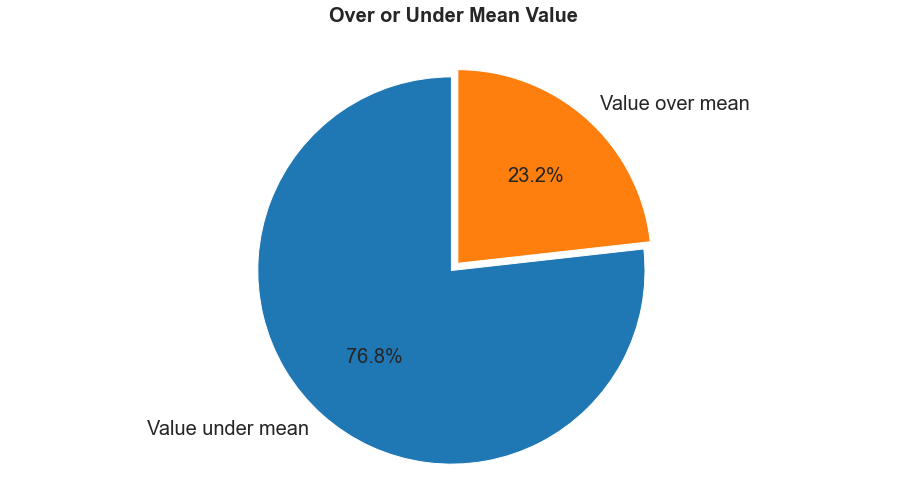

In [39]:
plt.figure(figsize=(16,8))
plt.title('Over or Under Mean Value', fontsize=20, fontweight='bold', y=1.05,)
labels = 'Value under mean', 'Value over mean'
explode=(0, 0.05)
plt.rcParams['font.size'] = 20.0
plt.pie(players_value["NumberOfPlayers"], explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

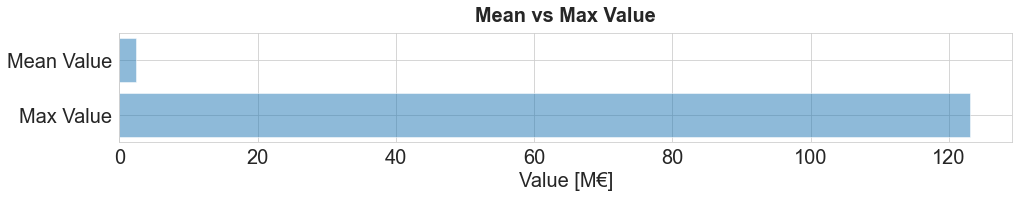

In [40]:
plt.figure(figsize=(16,2))
plt.title('Mean vs Max Value', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Value [M€]')

max_value = dataset['ValueNum'].max()
objects = ('Max Value', 'Mean Value')
y_pos = np.arange(len(objects))
performance = [max_value/1000000, mean_value/1000000]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)


plt.show()

<b>NOTE:</b> Mean Value of Player in FIFA 18 is about €2.4M. It seems to be lots of money, but it is still nothing when we compare it to €123M - Value of Neymar. Moreover Value of players is unequally distributed - only 23.2% of players cross this Value.

### 3.5. Over or Under Mean Wage
<a id="over_or_under_mean_wage"></a>

In [41]:
print('Mean wage of player in FIFA 18 is around: €' + str(round(mean_wage, -3)) + '.')

Mean wage of player in FIFA 18 is around: €12000.0.


In [42]:
players_wage = dataset.groupby("OverMeanWage").size().reset_index(name='NumberOfPlayers')

In [43]:
# Number of players with wage smaller then mean
players_wage

,OverMeanWage,NumberOfPlayers
0,0,13417
1,1,4564


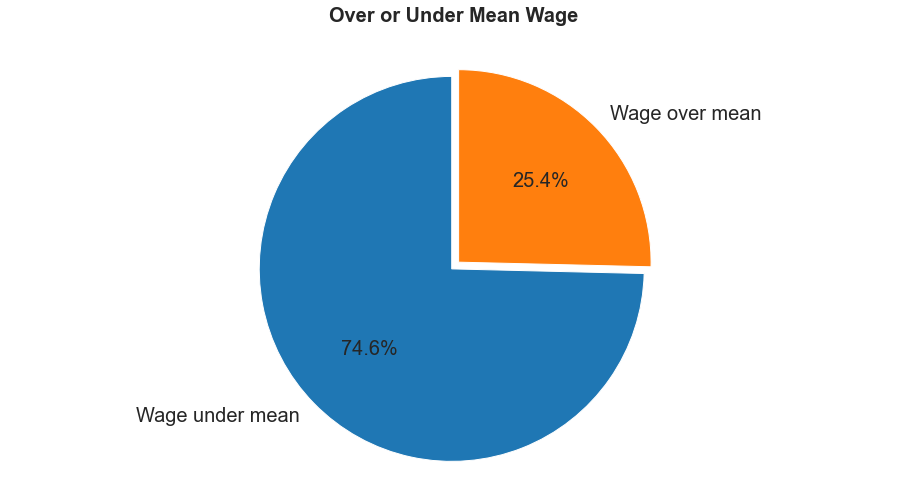

In [44]:
plt.figure(figsize=(16,8))
plt.title('Over or Under Mean Wage', fontsize=20, fontweight='bold', y=1.05,)
labels = 'Wage under mean', 'Wage over mean'
explode=(0, 0.05)
plt.rcParams['font.size'] = 20.0
plt.pie(players_wage["NumberOfPlayers"], explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

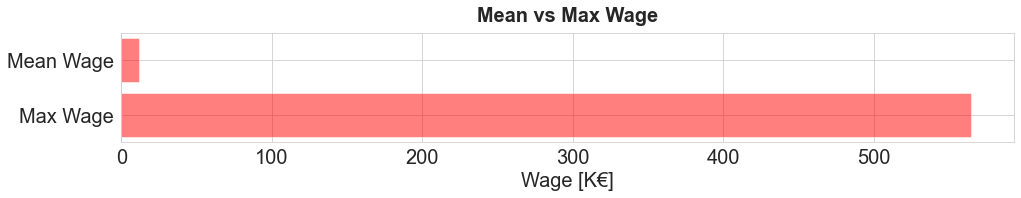

In [45]:
plt.figure(figsize=(16,2))
plt.title('Mean vs Max Wage', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Wage [K€]')

max_wage = dataset['WageNum'].max()
objects = ('Max Wage', 'Mean Wage')
y_pos = np.arange(len(objects))
performance = [max_wage/1000, mean_wage/1000]
 
plt.barh(y_pos, performance, align='center', alpha=0.5, color='red')
plt.yticks(y_pos, objects)

plt.show()

### 3.7. Players Value vs Age & Overall
<a id="players_value_vs_age_overall"></a>

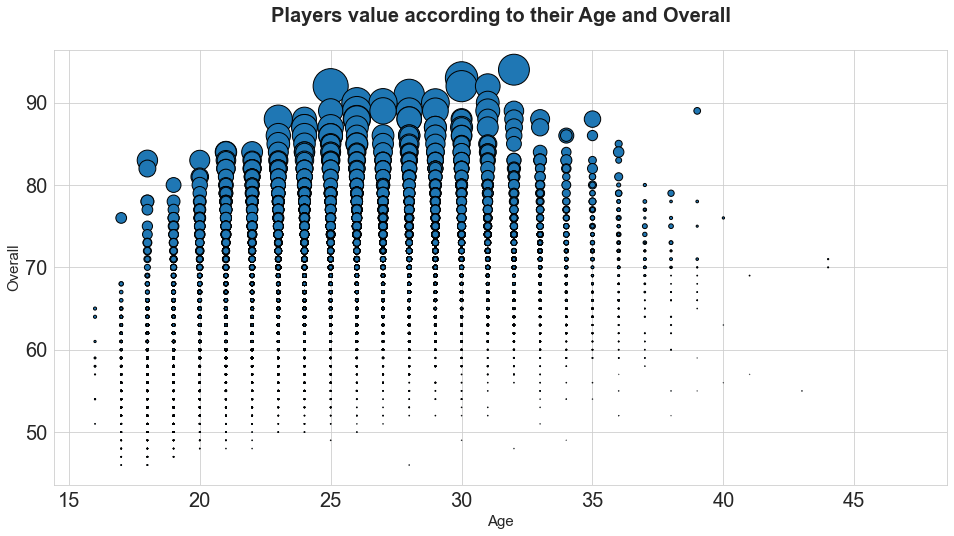

In [46]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players value according to their Age and Overall', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Overall', fontsize=15)

age = dataset["Age"].values
overall = dataset["Overall"].values
value = dataset["ValueNum"].values

plt.scatter(age, overall, s = value/100000, edgecolors='black')
plt.show()

### 3.8. Players Wage vs Age & Overall
<a id="players_wage_vs_age_overall"></a>

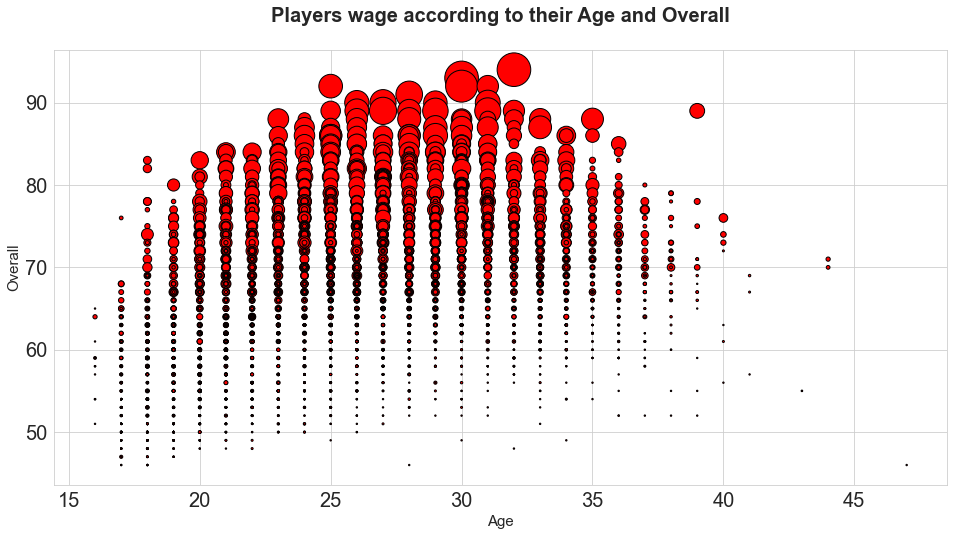

In [47]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players wage according to their Age and Overall', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Overall', fontsize=15)

age = dataset["Age"].values
overall = dataset["Overall"].values
value = dataset["WageNum"].values

plt.scatter(age, overall, s = value/500, edgecolors='black', color="red")
plt.show()

### 3.9. Overall vs Wage and Value
<a id="overall_vs_wage_and_value"></a>

<Figure size 432x288 with 0 Axes>

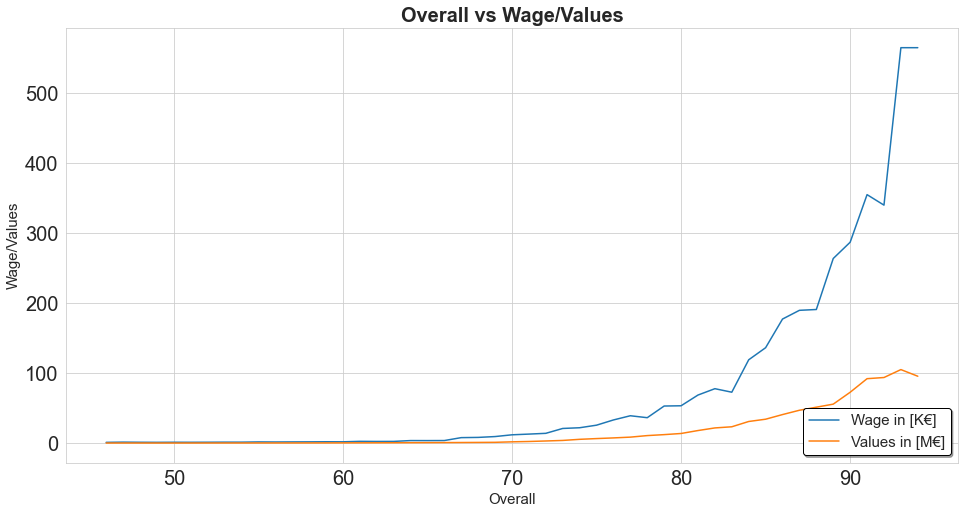

In [48]:
# Selecting unique Overall from DataFrame
overall = dataset.sort_values('Overall')['Overall'].unique()

overall_wage = dataset.groupby(['Overall'])['WageNum'].mean()
overall_wage = overall_wage.apply(lambda x: x/1000).values

overall_value = dataset.groupby(['Overall'])['ValueNum'].mean()
overall_value = overall_value.apply(lambda x: x/1000000).values

plt.figure()
plt.figure(figsize=(16,8))
plt.title('Overall vs Wage/Values', fontsize=20, fontweight='bold')
plt.xlabel('Overall', fontsize=15)
plt.ylabel('Wage/Values', fontsize=15)
sns.set_style("whitegrid")
plt.plot(overall, overall_wage, label="Wage in [K€]")
plt.plot(overall, overall_value, label="Values in [M€]")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

### 3.10. Player Position vs Value
<a id="player_position_vs_value"></a>

In [49]:
player_position_value = dataset.groupby("Position").mean().reset_index()[["Position", "ValueNum"]]
player_position_value = player_position_value.sort_values(["ValueNum"], ascending=False)
player_position_value["ValueNum"] = player_position_value["ValueNum"].apply(lambda x: x/1000000).values.tolist()

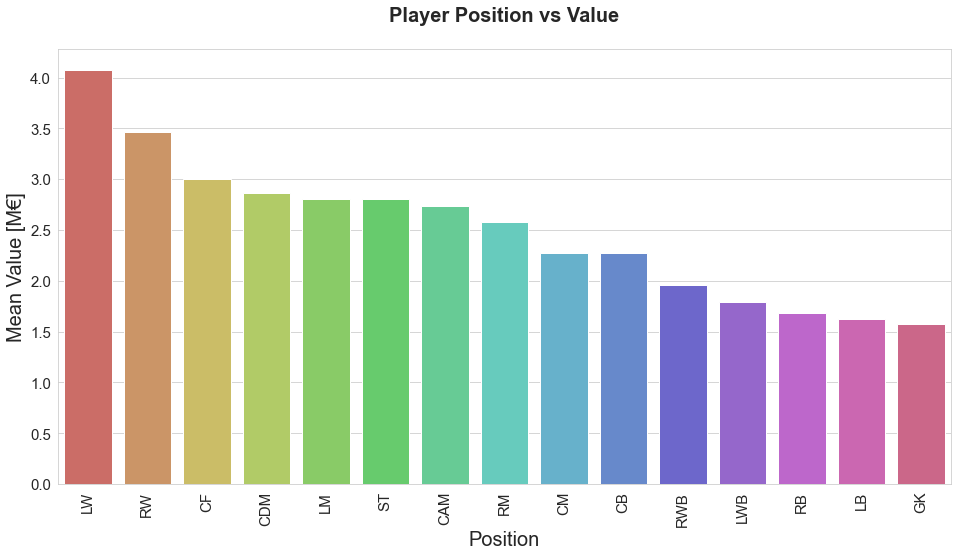

In [50]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Player Position vs Value', fontsize=20, fontweight='bold', y=1.05,)
sns.set(font_scale = 2)
b = sns.barplot(x="Position", y="ValueNum", data=player_position_value, palette="hls")
plt.xticks(rotation=90)
b.tick_params(labelsize=15)
plt.xlabel("Position", fontsize=20)
plt.ylabel('Mean Value [M€]', fontsize=20)
plt.show()

<b>NOTE:</b> As we can see in the chart above, offensive positions are most valuable in football. Mean Value of <b>RW</b> - Right winger, <b>LW</b> - Left winger and <b>CF</b> - Center forward is above €3.0M. The least valuable position is <b>GK</b>, with value just over €1.5M.

### 3.10. Top 1000 players Age vs. Mean Value
<a id="top_1000_players_age_vs_mean_value"></a>

In [51]:
top1000 = dataset.head(1000)

In [52]:
top1000 = top1000.groupby("Age").mean().reset_index()[["Age", "ValueNum"]]
top1000["ValueNum"] = top1000["ValueNum"].apply(lambda x: x/1000000)

In [53]:
top1000_age = top1000['Age'].values
top1000_value = top1000['ValueNum'].values

<Figure size 432x288 with 0 Axes>

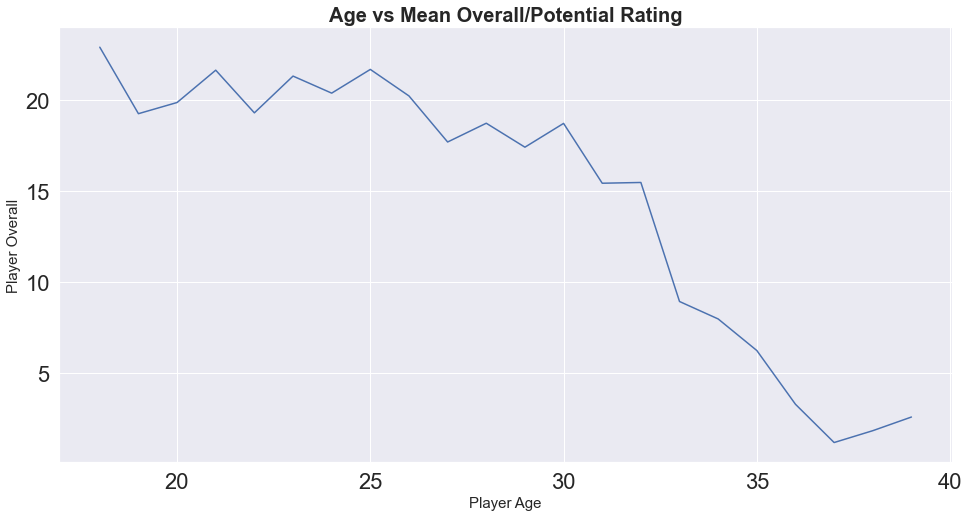

In [54]:
plt.figure()
plt.figure(figsize=(16,8))
plt.title('Age vs Mean Overall/Potential Rating', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Overall', fontsize=15)
sns.set_style("whitegrid")
plt.plot(top1000_age, top1000_value)
plt.show()

### 3.11. Clubs value
<a id="clubs_value"></a>

In [55]:
top_teams = dataset.groupby("Club").sum().sort_values("ValueNum", ascending=False).head(20).reset_index()[["Club", "Overall", "PotentialPoints", "ValueNum"]]

In [56]:
trace1 = go.Bar(
    x = top_teams["Club"].tolist(),
    y = top_teams["Overall"].tolist(),
    name='Team Overall',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)

trace2 = go.Bar(
    x = top_teams["Club"].tolist(),
    y = top_teams["PotentialPoints"].tolist(),
    name='Team Potential',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Scatter(
    x = top_teams["Club"].tolist(),
    y = (top_teams["ValueNum"] / 1000000).tolist(),
    name='Team Value [M€]',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2,trace3]

layout = go.Layout(
    barmode='stack',
    title = 'Is it really worth it?',
    titlefont=dict(size=25),
    width=850,
    height=500,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Team Overall/Potential',
        anchor = 'x',
        rangemode='tozero'
    ),
    xaxis = dict(title= 'Club Name'),
    yaxis2=dict(
        title='Team Value [M€]',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 200
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.05, y=0.05)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Thank you
Thank you very much for all ideas and suggestions.